In [1]:
pip install wordcloud nltk python-docx matplotlib

  Obtaining dependency information for python-docx from https://files.pythonhosted.org/packages/5f/d8/6948f7ac00edf74bfa52b3c5e3073df20284bec1db466d13e668fe991707/python_docx-1.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/239.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/239.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/239.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/239.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/239.6 kB 262.6 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/239.6 kB 363.1 kB/s eta 0:00:01
   --------------------- ---------------- 133.1/239.6 kB 657.1 kB/s eta 0:00:01
   -------------------------------- ----- 204.8/239.6 kB 831.5 kB/s eta 0:00:01
   -------------------------------------- 239.6/239.6 kB 862.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Pod timhle je WORDCLOUD
je nic moc zitra z nej zkusim vyjmout ty slova jako samozrejme atd

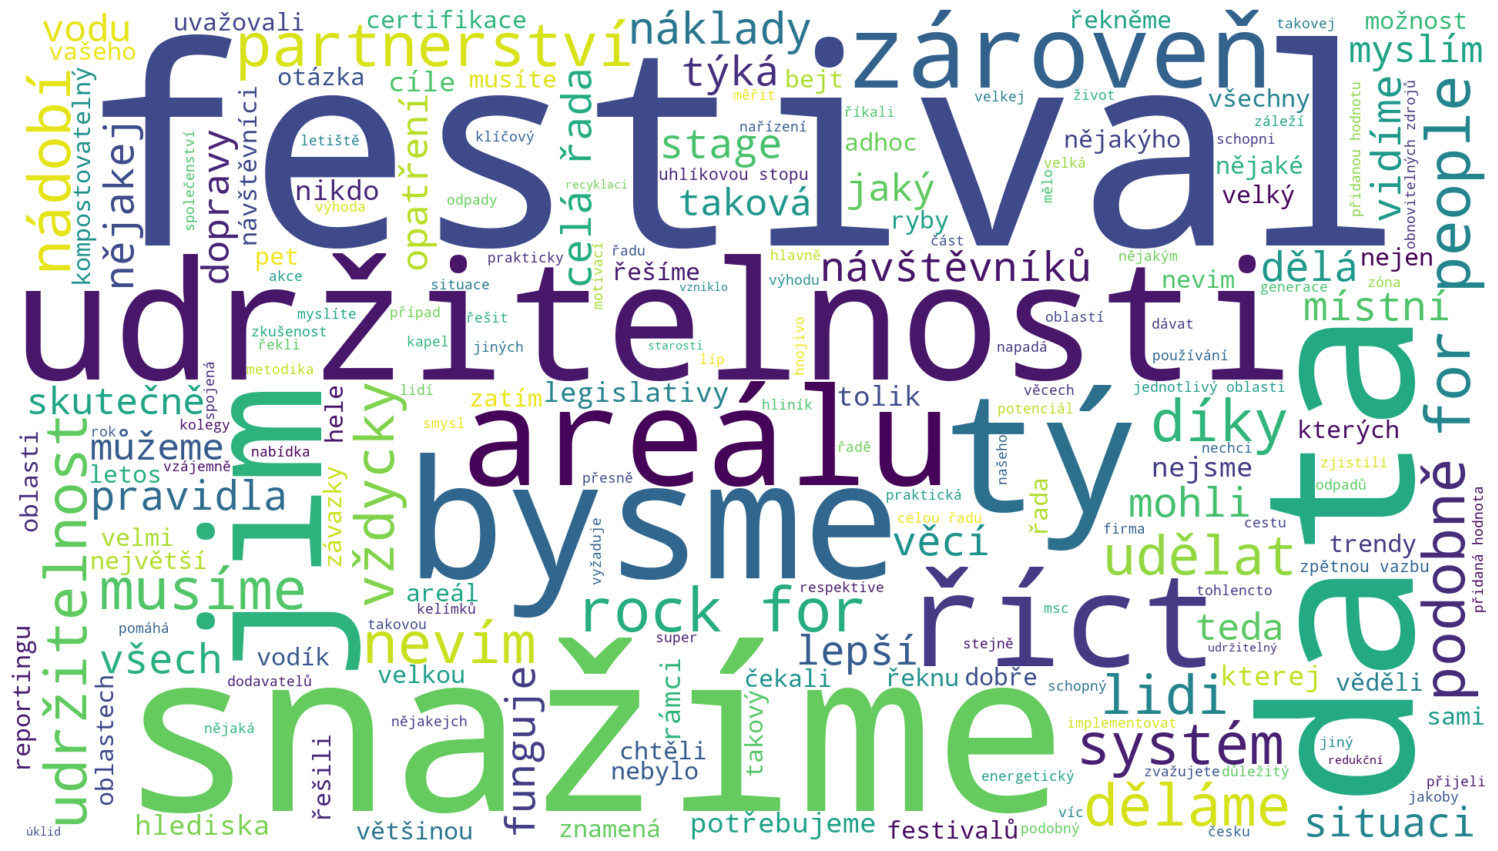

In [20]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from docx import Document
import matplotlib.pyplot as plt
import string
import nltk

doc = Document('text.docx')
text = ' '.join([paragraph.text for paragraph in doc.paragraphs])
text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))

with open('stopwords-cs.txt', 'r') as f:
    stopwords = set(f.read().splitlines())
stopwords.update(["samozřejmě", "těch", "jako", "právě", "dělat", "víme", "no", "jo", "věci", "nějaký", "teď", "nějakou", "měli", "věc", "ať", "spíš","festivalu","abychom", "zase","úplně"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width= 1920, height= 1080).generate(text)


plt.figure(figsize=(19.2, 10.8), facecolor='w')
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig('wordcloud.png', dpi=400, facecolor='w', bbox_inches='tight')
plt.show()


# Term Frequency-Inverse Document Frequency metoda
tady je pro každý odstavec vždy top 10 slov oskorovaných podle TFIDF metody. Bere to frekvenci slov v celem dokumentu a srovná jí to s frekevencí toho slova v konkretnim odstavci takže ve finale dostaneme slova která jsou specificka a zasadni pro ten konkretni odstavec. 

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc = Document('text.docx')
paragraphs = [paragraph.text for paragraph in doc.paragraphs]
paragraphs = [p.lower().translate(str.maketrans('', '', string.punctuation)) for p in paragraphs]

with open('stopwords-cs.txt', 'r') as f:
    stopwords = list(f.read().splitlines())

vectorizer = TfidfVectorizer(stop_words=stopwords)
tfidf_scores = vectorizer.fit_transform(paragraphs)

feature_names = vectorizer.get_feature_names_out()
for i, scores in enumerate(tfidf_scores.toarray()):
    sorted_indices = np.argsort(scores)[::-1]
    sorted_words = np.array(feature_names)[sorted_indices]
    sorted_scores = scores[sorted_indices]
    print(f'Paragraph {i+1}:')
    for word, score in zip(sorted_words[:10], sorted_scores[:10]):
        print(f'    {word}: {score}')

Paragraph 1:
    festivalu: 0.23304903615600783
    recyklaci: 0.19046356652790897
    zážitky: 0.19046356652790897
    přesahem: 0.19046356652790897
    starosti: 0.19046356652790897
    nesrozumitelne: 0.19046356652790897
    redukční: 0.19046356652790897
    část: 0.16424880549126636
    opatření: 0.1456491365356883
    festival: 0.12036831065075076
Paragraph 2:
    green: 0.21903553296045097
    peace: 0.21903553296045097
    praxi: 0.21903553296045097
    hodnota: 0.18888822311129672
    přidaná: 0.18888822311129672
    otázka: 0.1674983663694509
    for: 0.13735105652029667
    people: 0.13735105652029667
    rock: 0.13735105652029667
    tý: 0.12588958125330427
Paragraph 3:
    dopravit: 0.17759334482221795
    obecně: 0.17759334482221795
    poskytnout: 0.17759334482221795
    kapely: 0.17759334482221795
    zároveň: 0.1531063351516543
    návštěvníků: 0.13580716669006906
    dopravy: 0.13580716669006906
    věc: 0.13038070826781917
    podobně: 0.11136381943430758
    udržitel

# Nakonec tady je to samé ale v histogramech 
každý ostavec je jeden histogram, zítra se snad podívám na to jak to delimituje odstavce, protože jich tu je moc 51 odstavců v tom souboru není. 

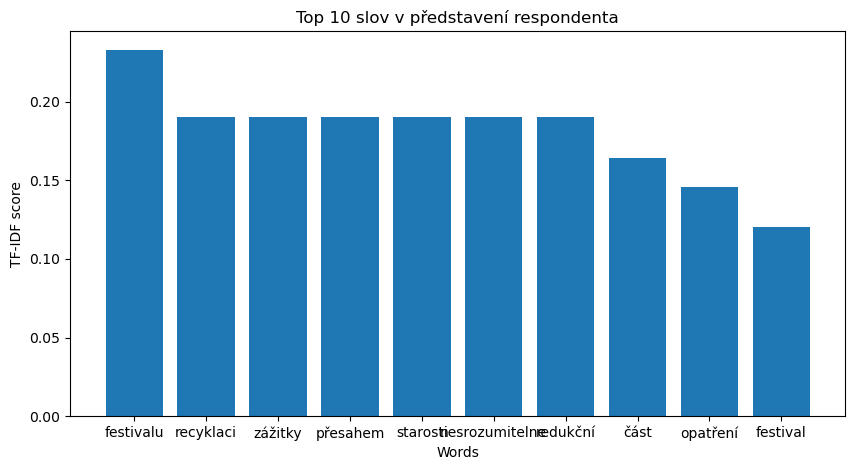

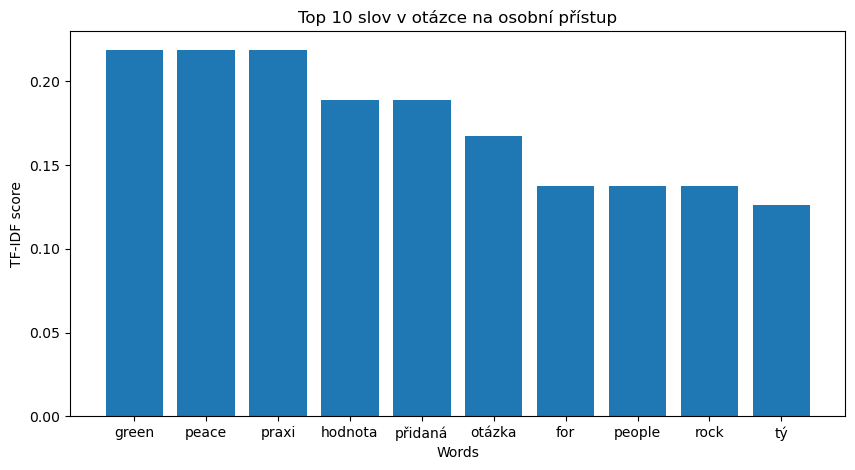

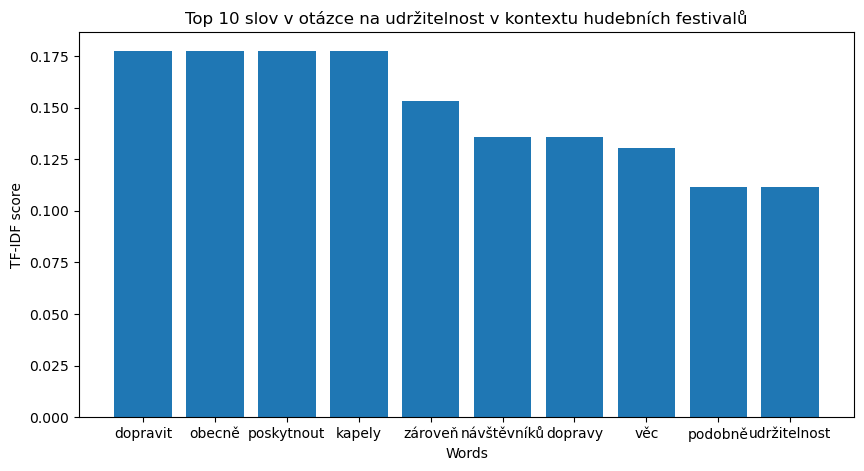

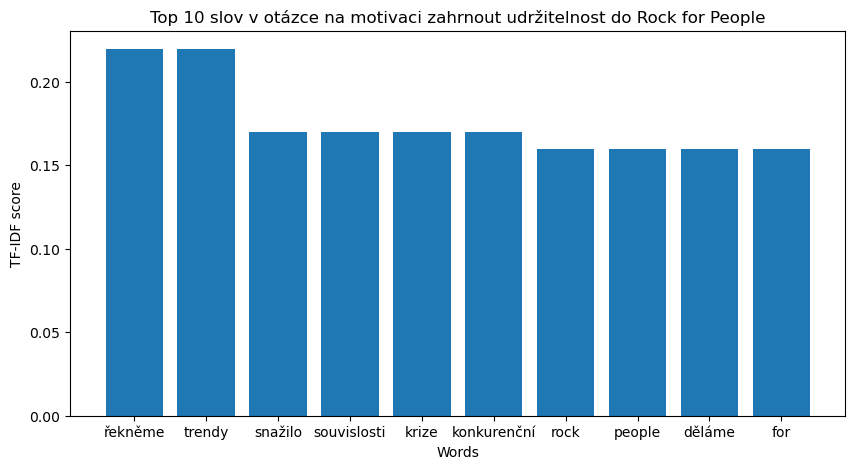

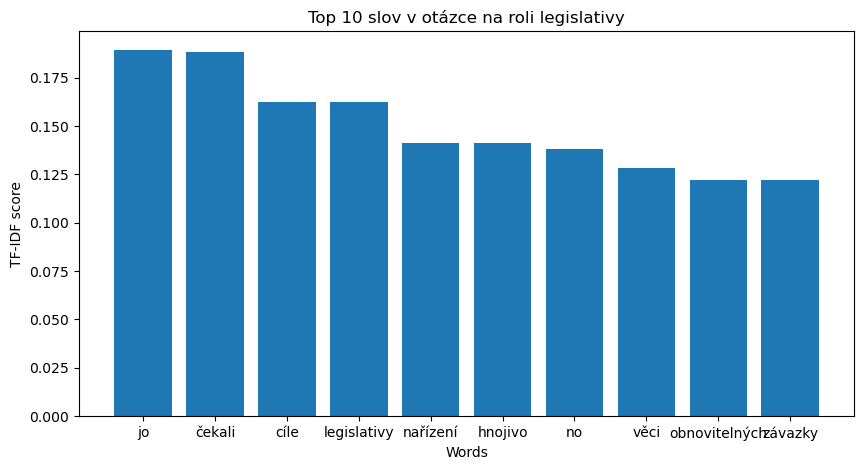

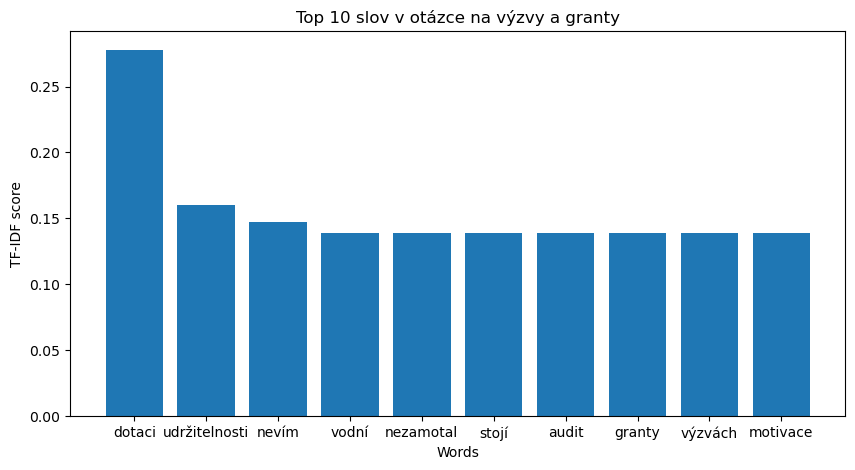

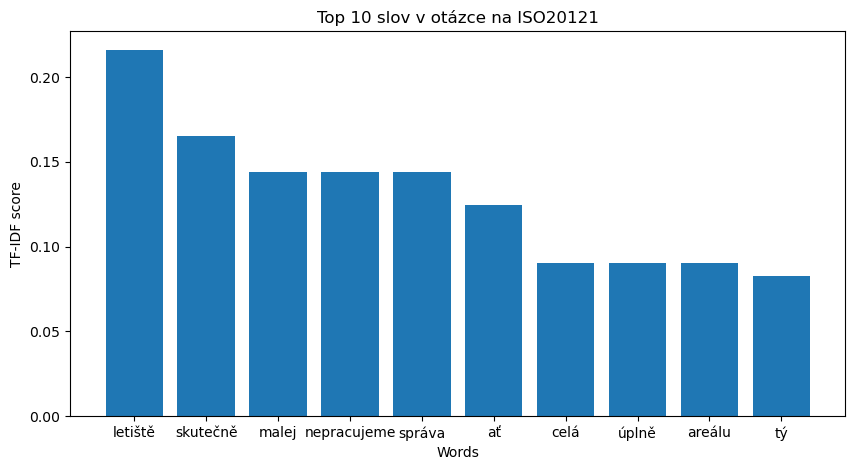

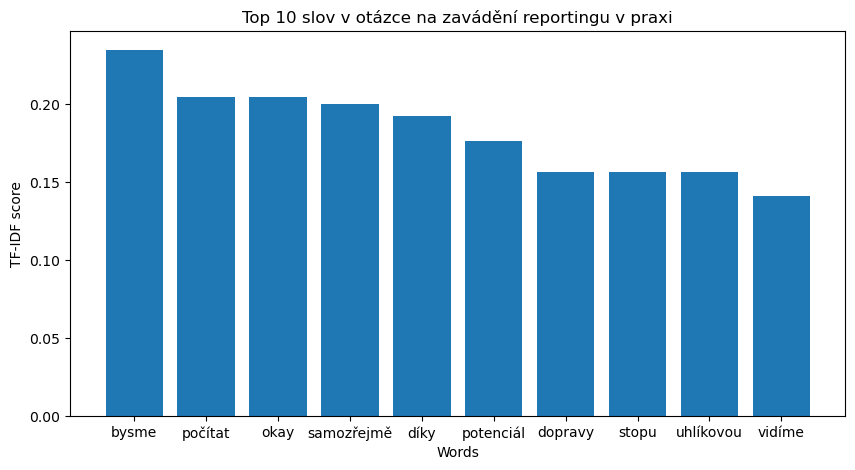

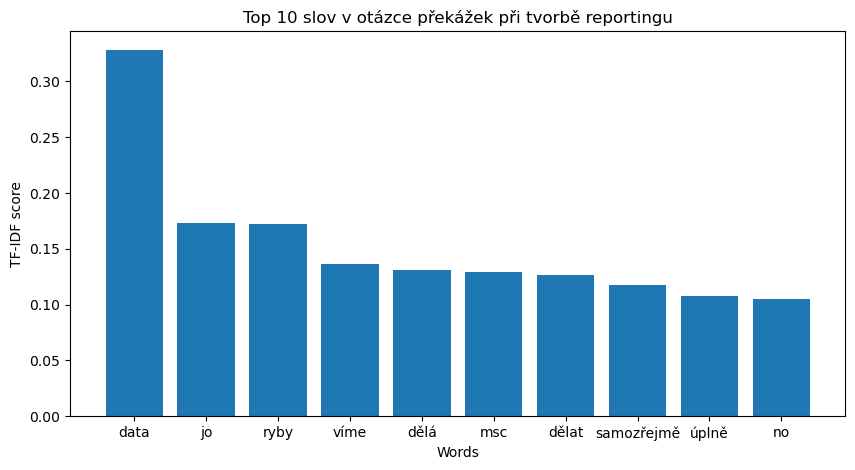

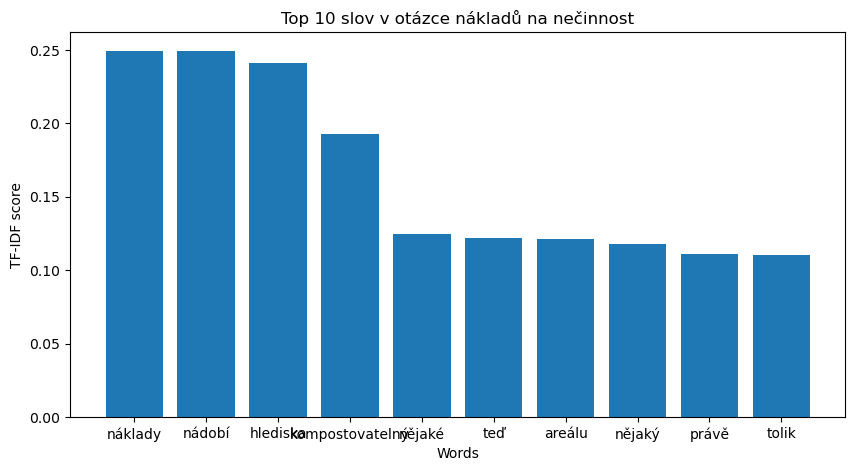

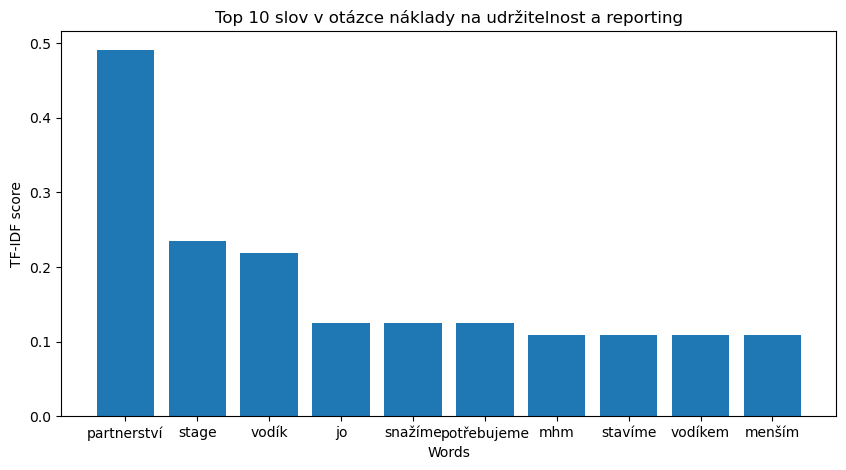

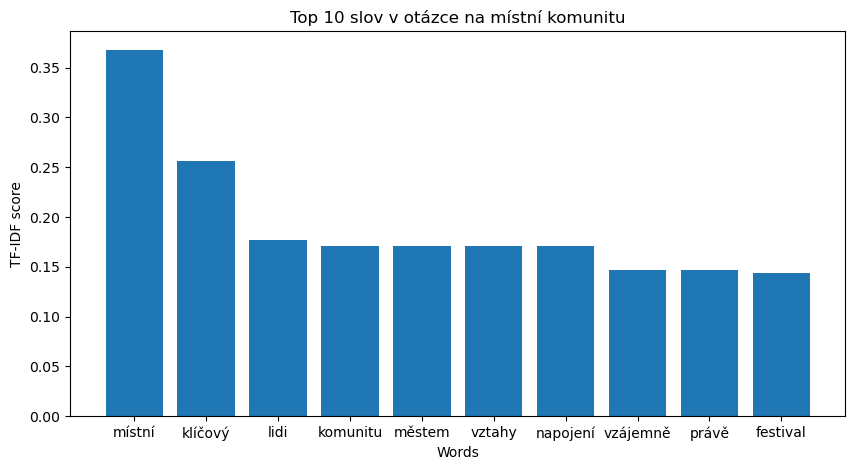

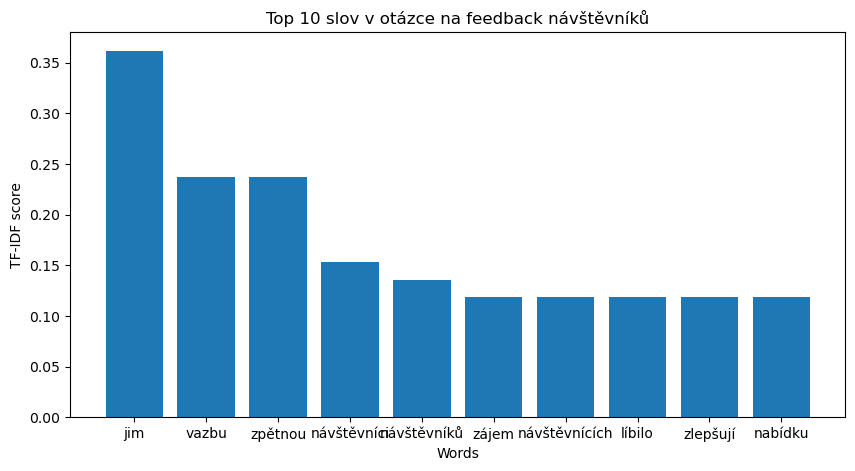

In [22]:
import numpy as np

tfidf_scores = vectorizer.fit_transform(paragraphs)

feature_names = vectorizer.get_feature_names_out()
titles = ["Top 10 slov v představení respondenta", 
          "Top 10 slov v otázce na osobní přístup", 
          "Top 10 slov v otázce na udržitelnost v kontextu hudebních festivalů", 
          "Top 10 slov v otázce na motivaci zahrnout udržitelnost do Rock for People", 
          "Top 10 slov v otázce na roli legislativy", 
          "Top 10 slov v otázce na výzvy a granty", 
          "Top 10 slov v otázce na ISO20121", 
          "Top 10 slov v otázce na zavádění reportingu v praxi", 
          "Top 10 slov v otázce překážek při tvorbě reportingu", 
          "Top 10 slov v otázce nákladů na nečinnost", 
          "Top 10 slov v otázce náklady na udržitelnost a reporting", 
          "Top 10 slov v otázce na místní komunitu", 
          "Top 10 slov v otázce na feedback návštěvníků"]
for i, scores in enumerate(tfidf_scores.toarray()):
    sorted_indices = np.argsort(scores)[::-1]
    sorted_words = np.array(feature_names)[sorted_indices]
    sorted_scores = scores[sorted_indices]
    
    plt.figure(figsize=(10, 5))
    plt.bar(sorted_words[:10], sorted_scores[:10])
    plt.title(titles[i])
    plt.xlabel('Words')
    plt.ylabel('TF-IDF score')
    plt.savefig(f'paragraph_{i+1}.png')
    plt.show()
